# Statistiques descriptives

## chargement des données



Nous allons utiliser un jeu de données des hospitalières relatives à l'épidémie de COVID-19 du 3 décembre 2020

https://www.data.gouv.fr/fr/datasets/donnees-hospitalieres-relatives-a-lepidemie-de-covid-19/

In [2]:
import pandas as pd

In [3]:
import pandas as pd

data = pd.read_csv('donnees-hospitalieres-covid19-2020-12-03-19h03.csv', sep = ";")
data

,dep,sexe,jour,hosp,rea,rad,dc
0,01,0,2020-03-18,2,0,1,0
1,01,1,2020-03-18,1,0,1,0
2,01,2,2020-03-18,1,0,0,0
3,02,0,2020-03-18,41,10,18,11
4,02,1,2020-03-18,19,4,11,6
...,...,...,...,...,...,...,...
79078,974,1,2020-12-03,31,3,320,23
79079,974,2,2020-12-03,31,6,321,27
79080,976,0,2020-12-03,9,3,518,35
79081,976,1,2020-12-03,7,2,250,21


In [4]:
data.dtypes

dep     object
sexe     int64
jour    object
hosp     int64
rea      int64
rad      int64
dc       int64
dtype: object

5 colonnes, donc 4 réelles

In [12]:
data.shape


(79083, 7)

79 083 lignes et 7 colonnes

Le jeu de données se composent de 7 colonnes.
Il renseigne de 4 données en fonction du département et du sexe du patient : 
1. le nombre de patients hospitalisés
2. le nombre de personnes actuellement en réanimation ou soins intensifs
3. le nombre cumulé de personnes retournées à domicile
4. le nombre cumulé de personnes décédées.

Remarque : il y a trois types de sexes car le sexe de certains patients n'a pas été identifié

## Statistiques descriptives

### Statistiques globales

In [6]:
data.describe()

,sexe,hosp,rea,rad,dc
count,79083.000000,79083.000000,79083.000000,79083.000000,79083.000000
mean,1.000000,97.341262,14.209603,525.497098,126.694523
std,0.816502,195.754426,36.308361,894.750008,220.873088
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,8.000000,1.000000,76.000000,15.000000
50%,1.000000,30.000000,3.000000,204.000000,45.000000
75%,2.000000,96.000000,12.000000,528.000000,124.000000
max,2.000000,3281.000000,855.000000,10224.000000,2517.000000


Il serait intéressant de connaître les statistiques globales par sexe.

In [14]:
data[data['sexe'] == 0].describe()

,sexe,hosp,rea,rad,dc
count,26361.0,26361.000000,26361.000000,26361.000000,26361.000000
mean,0.0,146.662873,21.399454,790.252267,190.432267
std,0.0,272.528836,48.821754,1237.634220,303.410418
min,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.0,13.000000,1.000000,126.000000,26.000000
50%,0.0,48.000000,5.000000,320.000000,77.000000
75%,0.0,150.000000,19.000000,812.000000,190.000000
max,0.0,3281.000000,855.000000,10224.000000,2517.000000


In [15]:
data[data['sexe'] == 1].describe()

,sexe,hosp,rea,rad,dc
count,26361.0,26361.000000,26361.000000,26361.000000,26361.000000
mean,1.0,77.041121,15.527180,408.922878,111.919464
std,0.0,146.075790,35.706982,661.711529,181.545531
min,1.0,0.000000,0.000000,0.000000,0.000000
25%,1.0,7.000000,1.000000,62.000000,15.000000
50%,1.0,25.000000,4.000000,158.000000,43.000000
75%,1.0,78.000000,14.000000,405.000000,109.000000
max,1.0,1894.000000,634.000000,5668.000000,1598.000000


In [16]:
data[data['sexe'] == 2].describe()

,sexe,hosp,rea,rad,dc
count,26361.0,26361.000000,26361.000000,26361.000000,26361.000000
mean,2.0,68.319791,5.702174,377.316149,77.731839
std,0.0,125.160249,13.062463,571.442396,121.092540
min,2.0,0.000000,0.000000,0.000000,0.000000
25%,2.0,5.000000,0.000000,64.000000,11.000000
50%,2.0,22.000000,1.000000,161.000000,30.000000
75%,2.0,70.000000,5.000000,398.000000,79.000000
max,2.0,1364.000000,220.000000,4574.000000,914.000000


On conclut que les certains de sexe non identifié sont le plus touché par le Covid-19 ce qui est normal puisque cela concerne plus de personnes. On constate qu'entre l'homme et la femme, un sexe est plus touché que l'autre : le sexe numéroté 1.

In [18]:
print(data[data['sexe'] == 0].hosp.sum())
print(data[data['sexe'] == 1].hosp.sum())
print(data[data['sexe'] == 2].hosp.sum())

3866180
2030881
1800978


### Représentation graphique

On va représenter un boxplot de nos données.

Pour représenter graphiquement les choses, on utilise matplotlib. On va toujours procéder de la même manière : 

1. créer le graphique avec matplotlib
2. ajouter des choses au dessin
3. représenter la figure

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

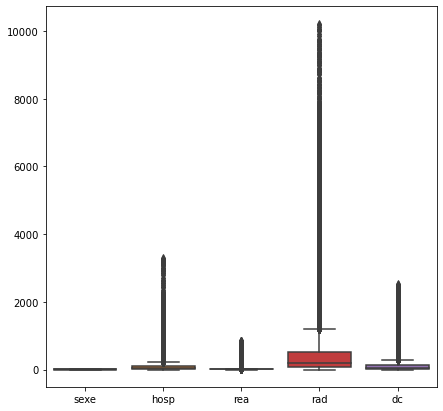

In [22]:
# 1. créer le dessin (ici ax)
fig, ax = plt.subplots(figsize=(7, 7)) 

#  2. ajouter des choses au dessin
sns.boxplot(data=data,   
            ax=ax)

# 3. représenter le graphique
plt.show() 

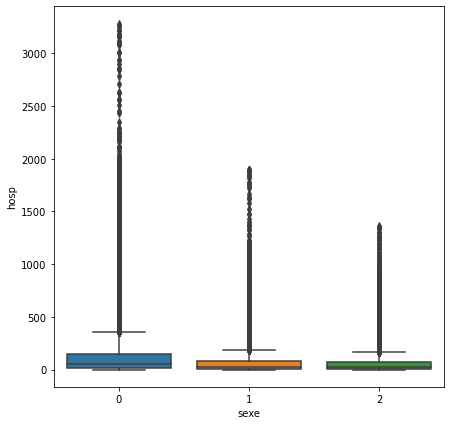

In [23]:
fig, ax = plt.subplots(figsize=(7, 7)) 

sns.boxplot(x='sexe',
            y= 'hosp',
            data=data,              
            ax=ax)

plt.show() 

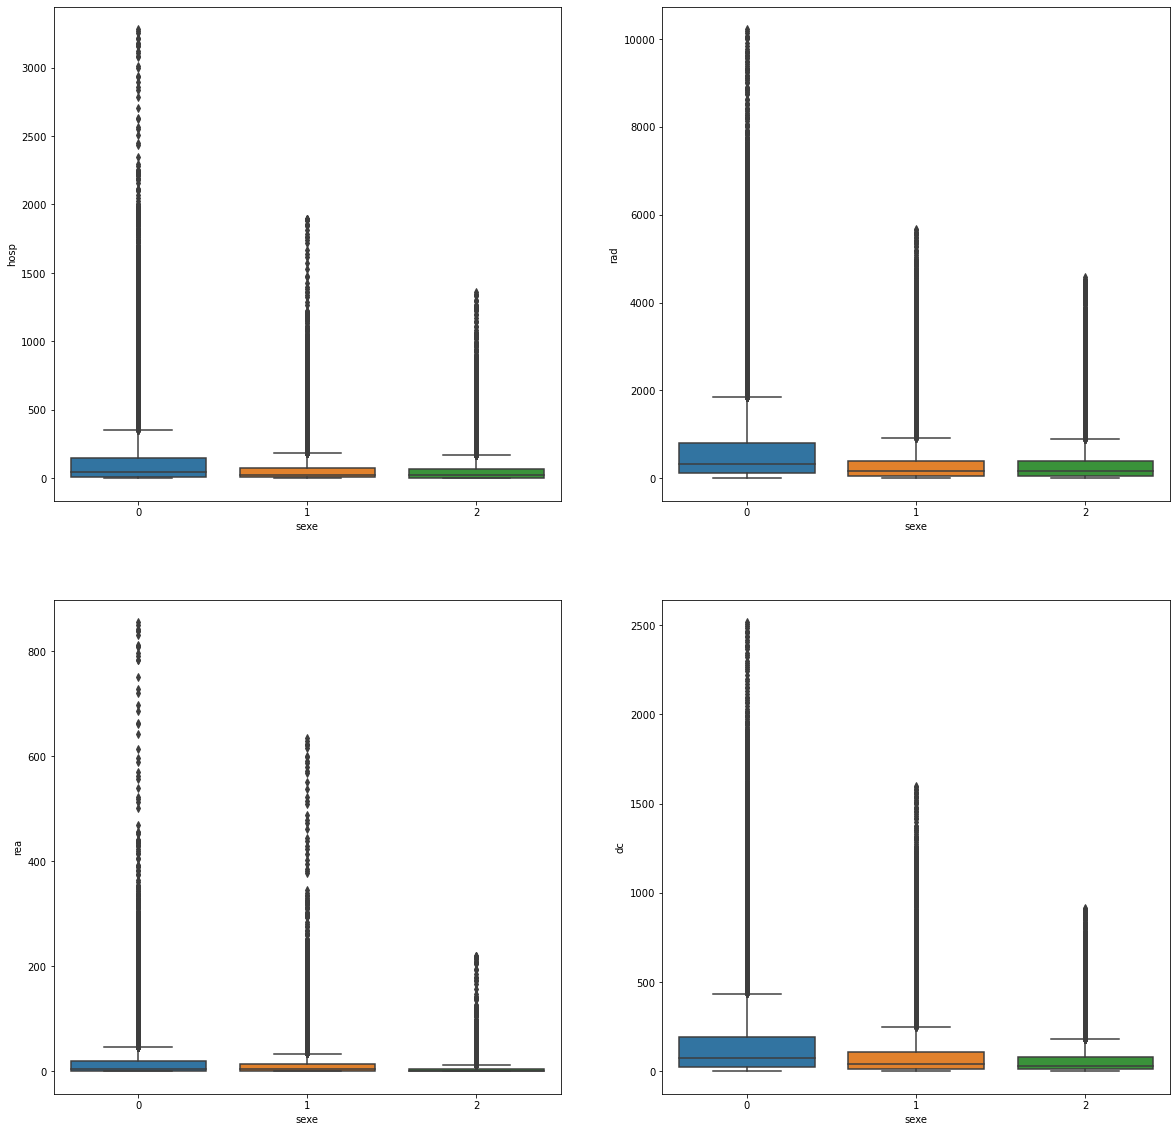

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(20, 20)) 

sns.boxplot(x='sexe',
            y= 'hosp',
            data=data,              
            ax=ax[0,0])

sns.boxplot(x='sexe',
            y= 'rea',
            data=data,              
            ax=ax[1,0])

sns.boxplot(x='sexe',
            y= 'rad',
            data=data,              
            ax=ax[0,1])

sns.boxplot(x='sexe',
            y= 'dc',
            data=data,              
            ax=ax[1,1])


plt.show() 

Les données possèdent des valeurs extrêmes qui aplatit les boites. Cette représentation n'est pas adapté pour la visualisation des données.